# Projet AirBnB - Prétraitement des Données (Side Quest)
### Ce notebook a pour objectif de préparer le dataset pour la prédiction du prix d'un logement sur Airbnb.
### Il est structuré en plusieurs sections : chargement et exploration des données, prétraitement, et séparation des données pour une future modélisation.
### Chaque membre pourra compléter sa partie en fonction de son rôle.

 ## Table des Matières
### 1. Introduction
### 2. Chargement et Exploration des Données
### 3. Prétraitement des Données
###    - 3.1 Sélection des Colonnes Pertinentes
###    - 3.2 Suppression des Doublons
###    - 3.3 Gestion des Valeurs Manquantes
###    - 3.4 Conversion des Types de Données
###    - 3.5 Gestion des Valeurs Aberrantes
### 4. Séparation des Données (Train/Test Split)
### 5. Bonus: Préparation pour la Régression Linéaire
### 6. Conclusion et Perspectives


## 1. Introduction
### Dans ce projet, nous préparons le dataset AirBnB afin de prédire le prix des logements.
### Ce notebook se concentre sur la partie prétraitement des données avant l'application des algorithmes de prédiction.
### Chaque membre de l'équipe pourra ajouter des analyses ou des ajustements au fur et à mesure.


In [76]:
# 1. Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline



 ## 2. Chargement et Exploration des Données
### Charger le fichier CSV et effectuer une première exploration du dataset.

In [77]:
# 2. Chargement des données
file_path = 'listings.csv'  # Remplacer par le chemin de votre fichier
df = pd.read_csv(file_path)

# Affichage des premières lignes pour vérifier
print(df.head())


     id                        listing_url       scrape_id last_scraped  \
0  3109  https://www.airbnb.com/rooms/3109  20241206031559   2024-12-07   
1  5396  https://www.airbnb.com/rooms/5396  20241206031559   2024-12-09   
2  7397  https://www.airbnb.com/rooms/7397  20241206031559   2024-12-08   
3  7964  https://www.airbnb.com/rooms/7964  20241206031559   2024-12-09   
4  9359  https://www.airbnb.com/rooms/9359  20241206031559   2024-12-09   

            source                                             name  \
0      city scrape                                     zen and calm   
1      city scrape     Your perfect Paris studio on Île Saint-Louis   
2      city scrape                 MARAIS - 2ROOMS APT - 2/4 PEOPLE   
3  previous scrape                     Sunny apartment with balcony   
4      city scrape  Cozy, Central Paris: WALK or VELIB EVERYWHERE !   

                                         description  \
0  Lovely Appartment with one bedroom with a Quee...   
1  NEW SOF

 ## 3. Prétraitement des Données
### Dans cette section, nous allons préparer le dataset pour l'analyse.
### Cette partie est à compléter par les membres de l'équipe selon les besoins.

## 3.1 Sélection des Colonnes Pertinentes
### Sélectionner les colonnes jugées importantes pour la prédiction du prix.

In [78]:
# 3. Sélection des colonnes pertinentes
colonnes_pertinentes = [
    'price', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
    'bathrooms_text', 'neighbourhood_cleansed', 'host_is_superhost',
    'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating',
    'instant_bookable'
]

df = df[colonnes_pertinentes]
print(df.columns)


Index(['price', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'bathrooms_text', 'neighbourhood_cleansed', 'host_is_superhost',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable'],
      dtype='object')


## Colonnes Conservées :

**price** : C'est la variable à prédire, le prix du logement.

**property_type et room_type** : Elles décrivent la nature du logement (appartement, maison, chambre privée, etc.), ce qui a un impact direct sur le tarif.

**accommodates, bedrooms et beds** : Ces indicateurs de capacité et de confort permettent d’estimer la taille et la qualité du logement.

**bathrooms / bathrooms_text** : Ils renseignent sur le confort, en précisant le nombre de salles de bains.

**amenities** : La présence d’équipements (wifi, climatisation, etc.) peut justifier un prix plus élevé.

**neighbourhood_cleansed** : Ces informations de localisation sont essentielles pour tenir compte de l’emplacement, un facteur clé dans la tarification.

**host_is_superhost** : Un hôte reconnu peut influencer positivement le prix.

**minimum_nights, maximum_nights et availability_365** : Ces variables reflètent la politique de séjour et la disponibilité, pouvant influencer la stratégie tarifaire.

**number_of_reviews, review_scores_rating et reviews_per_month** : Les avis et notes donnent une indication sur la qualité perçue du logement et sa popularité, ce qui peut impacter le prix.

**instant_bookable** : Un logement facilement réservé peut être perçu comme plus attractif.

## Colonnes Écartées :

**id, listing_url, scrape_id, source** : Ce sont des identifiants ou des liens techniques sans rapport avec le prix.

**name, description, neighborhood_overview** : Champs textuels qui demanderaient un traitement avancé (NLP) pour être exploités.

**host_id, host_url, host_name, host_about, host_location, host_verifications, etc.** : Informations sur l’hôte qui, bien que pouvant être intéressantes pour une analyse plus poussée, n'apportent pas directement de valeur pour la prédiction du prix.

**picture_url, host_thumbnail_url, host_picture_url** : Liens vers des images, non exploitables sans traitement en vision par ordinateur.

**last_scraped, calendar_last_scraped, calendar_updated** : Dates techniques qui n’influencent pas directement le modèle de tarification.

**Variables redondantes ou dérivées (ex. : minimum_minimum_nights, maximum_minimum_nights, etc.)** : Elles fournissent des informations déjà couvertes par les colonnes principales comme minimum_nights et maximum_nights.

**Review scores détaillés (accuracy, cleanliness, checkin, communication, location, value)** : Nous utilisons la note globale review_scores_rating pour garder une vision synthétique.

**latitude et longitude** : Utilisées telles quelles, elles ne sont pas directement exploitables pour prédire le prix. En effet, ces coordonnées brutes nécessitent un prétraitement afin de fournir une information géographique plus pertinente.

## Raison de la sélection :
Nous avons retenu les colonnes qui fournissent des informations directement liées aux caractéristiques du logement, à sa localisation, au confort et à la réputation, car ce sont des facteurs déterminants pour fixer le prix. Les colonnes écartées sont soit des identifiants techniques, soit des données textuelles ou redondantes qui nécessiteraient un traitement supplémentaire pour être utiles dans une première approche.

Ce choix permet de concentrer l'analyse sur les variables ayant un impact immédiat sur le tarif, tout en simplifiant la préparation du dataset pour la modélisation.

## 3.2 Suppression des Doublons
### Identifier et supprimer les doublons dans le dataset.

In [79]:
colonnes_cles = ['price', 'room_type', 'neighbourhood_cleansed', 'minimum_nights', 'number_of_reviews']
df_cleaned = df.drop_duplicates(subset=colonnes_cles, keep='first')

print("Doublons avant suppression :", df.duplicated(subset=colonnes_cles).sum())
print("Doublons après suppression :", df_cleaned.duplicated(subset=colonnes_cles).sum())

Doublons avant suppression : 30010
Doublons après suppression : 0


## 3.3 Gestion des Valeurs Manquantes
### Identifier et traiter les valeurs manquantes.


In [80]:
# 5. Gestion des valeurs manquantes
# Nettoyer la colonne 'price' (enlever le signe '$' et convertir en numérique)
df_cleaned['price'] = df_cleaned['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Remplacer les NaN dans 'price' par la médiane
df_cleaned['price'] = df_cleaned['price'].fillna(df_cleaned['price'].median())

# Remplir les NaN dans 'property_type' par la valeur la plus fréquente (mode)
df_cleaned['property_type'] = df_cleaned['property_type'].fillna(df_cleaned['property_type'].mode()[0])

# Remplir les NaN dans 'room_type' par la valeur la plus fréquente (mode)
df_cleaned['room_type'] = df_cleaned['room_type'].fillna(df_cleaned['room_type'].mode()[0])

# Remplir les NaN dans 'accommodates' par la médiane (car c'est un nombre)
df_cleaned['accommodates'] = df_cleaned['accommodates'].fillna(df_cleaned['accommodates'].median())

# Remplir les NaN dans 'bedrooms' par la médiane
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].fillna(df_cleaned['bedrooms'].median())

# Remplir les NaN dans 'beds' par la médiane
df_cleaned['beds'] = df_cleaned['beds'].fillna(df_cleaned['beds'].median())

# Remplacer les NaN dans 'bathrooms_text' par 'Inconnu' (texte)
df_cleaned['bathrooms_text'] = df_cleaned['bathrooms_text'].fillna('Inconnu')


# Remplacer les NaN dans 'neighbourhood_cleansed' par 'Inconnu' (zone géographique)
df_cleaned['neighbourhood_cleansed'] = df_cleaned['neighbourhood_cleansed'].fillna('Inconnu')

# Remplacer les NaN dans 'host_is_superhost' par 'Non' (si l'hôte n'est pas un superhôte)
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].fillna('f')

# Remplir les NaN dans 'minimum_nights' par la médiane
df_cleaned['minimum_nights'] = df_cleaned['minimum_nights'].fillna(df_cleaned['minimum_nights'].median())

# Remplir les NaN dans 'maximum_nights' par la médiane
df_cleaned['maximum_nights'] = df_cleaned['maximum_nights'].fillna(df_cleaned['maximum_nights'].median())

# Remplacer les NaN dans 'number_of_reviews' par la médiane
df_cleaned['number_of_reviews'] = df_cleaned['number_of_reviews'].fillna(df_cleaned['number_of_reviews'].median())

# Remplacer les NaN dans 'review_scores_rating' par la médiane
df_cleaned['review_scores_rating'] = df_cleaned['review_scores_rating'].fillna(df_cleaned['review_scores_rating'].median())

# Remplacer les NaN dans 'instant_bookable' par 'Non' (si ce n'est pas immédiatement réservable)
df_cleaned['instant_bookable'] = df_cleaned['instant_bookable'].fillna('f')

# Vérification finale des valeurs manquantes après traitement
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61021 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   61021 non-null  float64
 1   property_type           61021 non-null  object 
 2   room_type               61021 non-null  object 
 3   accommodates            61021 non-null  int64  
 4   bedrooms                61021 non-null  float64
 5   beds                    61021 non-null  float64
 6   bathrooms_text          61021 non-null  object 
 7   neighbourhood_cleansed  61021 non-null  object 
 8   host_is_superhost       61021 non-null  object 
 9   minimum_nights          61021 non-null  int64  
 10  maximum_nights          61021 non-null  int64  
 11  number_of_reviews       61021 non-null  int64  
 12  review_scores_rating    61021 non-null  float64
 13  instant_bookable        61021 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory u

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\4192619576.py:3: SyntaxWarning: invalid escape sequence '\$'
  df_cleaned['price'] = df_cleaned['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\4192619576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price'] = df_cleaned['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\4192619576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

 # 3.4 Conversion des Types de Données
### Convertir les colonnes en types appropriés, par exemple convertir 'price' en numérique.

In [81]:
# 6. Conversion des types de données
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].map({'t': 'Oui', 'f': 'Non'}).astype('category')
df_cleaned['instant_bookable'] = df_cleaned['instant_bookable'].map({'t': 'Oui', 'f': 'Non'}).astype('category')


C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\3285921838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].map({'t': 'Oui', 'f': 'Non'}).astype('category')
C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\3285921838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['instant_bookable'] = df_cleaned['instant_bookable'].map({'t': 'Oui', 'f': 'Non'}).astype('category')


<class 'pandas.core.frame.DataFrame'>
Index: 61021 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  61021 non-null  float64
 1   accommodates           61021 non-null  int64  
 2   bedrooms               61021 non-null  float64
 3   latitude               61021 non-null  float64
 4   longitude              61021 non-null  float64
 5   minimum_nights         61021 non-null  int64  
 6   maximum_nights         61021 non-null  int64  
 7   number_of_reviews      61021 non-null  int64  
 8   review_scores_rating   61021 non-null  float64
 9   host_is_superhost      61021 non-null  bool   
 10  instant_bookable       61021 non-null  bool   
 11  room_type_encoded      61021 non-null  int32  
 12  neighbourhood_encoded  61021 non-null  int32  
 13  bathrooms_count        61021 non-null  int64  
dtypes: bool(2), float64(5), int32(2), int64(5)
memory usage: 5.

# 3.5 Gestion des Valeurs Aberrantes
### Détecter et gérer les valeurs aberrantes à l'aide de visualisations. 

In [82]:
# 7. Gestion des valeurs aberrantes avec l'IQR
def traiter_outliers(df, colonne, facteur=1.5):
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inferieure = Q1 - facteur * IQR
    borne_superieure = Q3 + facteur * IQR
    df[colonne] = np.where(df[colonne] < borne_inferieure, df[colonne].median(), df[colonne])
    df[colonne] = np.where(df[colonne] > borne_superieure, df[colonne].median(), df[colonne])
    return df

# Liste des colonnes numériques que nous souhaitons traiter pour les outliers
colonnes_numeriques = ['price', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating']

# Appliquer la fonction pour chaque colonne numérique
for colonne in colonnes_numeriques:
    df_cleaned = traiter_outliers(df_cleaned, colonne)

# Afficher les premières lignes après traitement des outliers
print(df_cleaned.head())


   price       property_type        room_type  accommodates  bedrooms  beds  \
0  100.0  Entire rental unit  Entire home/apt           2.0       1.0   1.0   
1   88.0  Entire rental unit  Entire home/apt           2.0       0.0   1.0   
2  136.0  Entire rental unit  Entire home/apt           4.0       2.0   1.0   
3  150.0  Entire rental unit  Entire home/apt           3.0       2.0   2.0   
4   75.0  Entire rental unit  Entire home/apt           1.0       1.0   1.0   

  bathrooms_text neighbourhood_cleansed host_is_superhost  minimum_nights  \
0         1 bath           Observatoire               Non             2.0   
1         1 bath         Hôtel-de-Ville               Non             3.0   
2         1 bath         Hôtel-de-Ville               Oui             3.0   
3         1 bath                  Opéra               Non             7.0   
4         1 bath                 Louvre               Non             3.0   

   maximum_nights  number_of_reviews  review_scores_rating ins

C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\706044858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colonne] = np.where(df[colonne] < borne_inferieure, df[colonne].median(), df[colonne])
C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\706044858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colonne] = np.where(df[colonne] > borne_superieure, df[colonne].median(), df[colonne])
C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\706044858.py:8: SettingWithCopy

# Prix en relation avec la note du bien

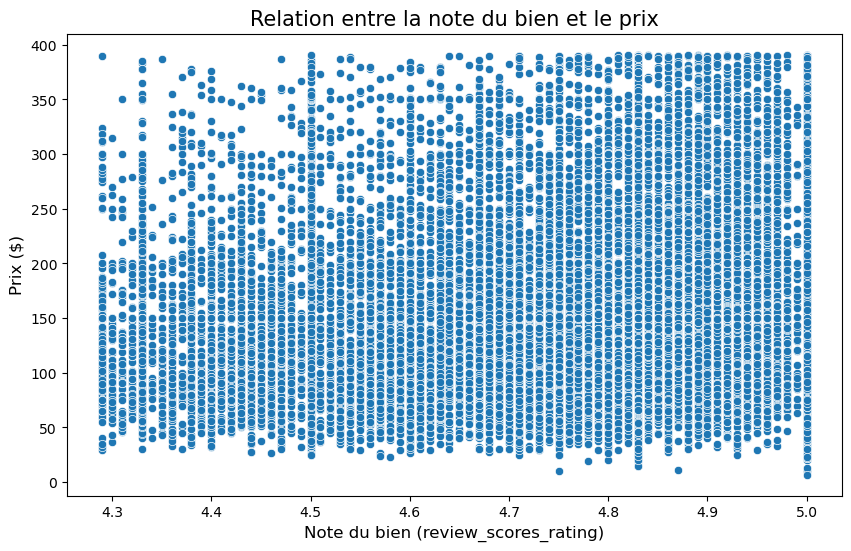

In [83]:
# 8. Relation entre prix et note du bien
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='review_scores_rating', y='price')
plt.title('Relation entre la note du bien et le prix', fontsize=15)
plt.xlabel('Note du bien (review_scores_rating)', fontsize=12)
plt.ylabel('Prix ($)', fontsize=12)
plt.show()


# Prix moyen par type de propriétés

property_type
Room in boutique hotel               208.765810
Room in aparthotel                   195.933333
Entire serviced apartment            193.057692
Room in hotel                        187.875878
Entire townhouse                     185.311881
Entire loft                          179.574616
Entire home                          177.245658
Entire rental unit                   155.787398
Entire condo                         155.587394
Private room in loft                 123.452830
Private room in home                 122.091954
Private room in bed and breakfast    121.848739
Private room in rental unit          117.163567
Private room in condo                115.637681
Shared room in rental unit           109.344037
Private room in townhouse            109.031746
Shared room in hostel                 41.196078
Name: price, dtype: float64


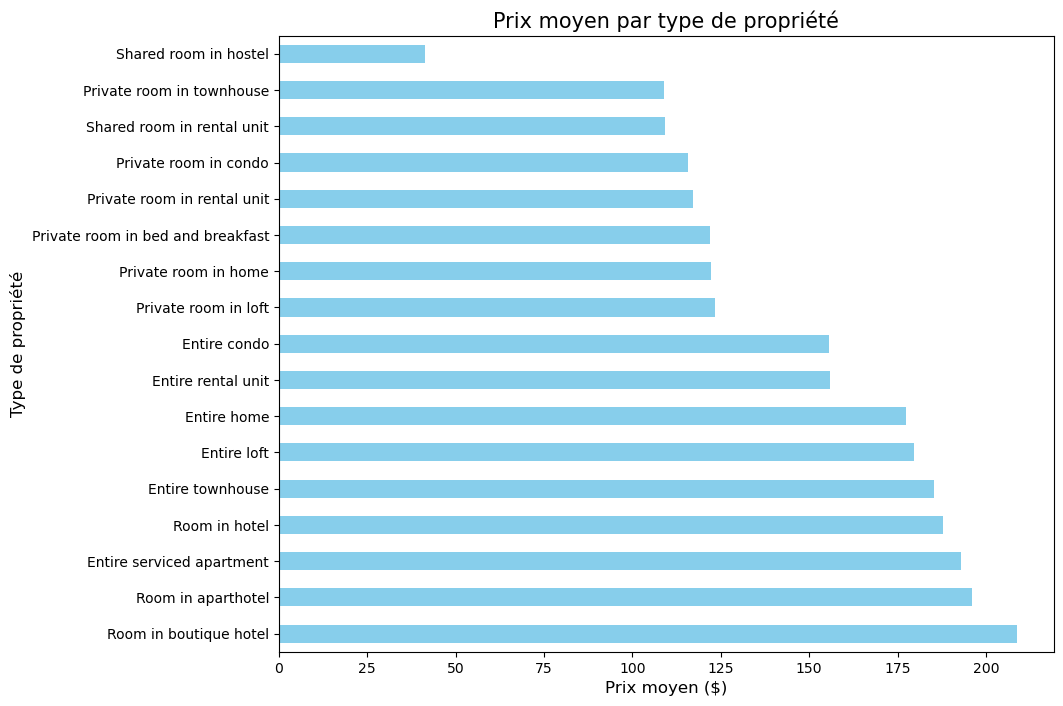

In [84]:
# 9. Calcul du prix moyen par type de propriété
prix_moyen_par_type = df_cleaned.groupby('property_type')['price'].mean().sort_values(ascending=False)

# Filtrer les types de propriétés les plus fréquents
types_frequents = df_cleaned['property_type'].value_counts()
types_frequents = types_frequents[types_frequents > 50].index

# Filtrer les prix moyens pour ne garder que les types fréquents
prix_moyen_par_type_filtré = prix_moyen_par_type[prix_moyen_par_type.index.isin(types_frequents)]

# Affichage des résultats sous forme de tableau
print(prix_moyen_par_type_filtré)

# Visualisation du prix moyen par type de propriété avec un graphique horizontal
plt.figure(figsize=(10, 8))
prix_moyen_par_type_filtré.plot(kind='barh', color='skyblue')
plt.title('Prix moyen par type de propriété', fontsize=15)
plt.xlabel('Prix moyen ($)', fontsize=12)
plt.ylabel('Type de propriété', fontsize=12)
plt.show()


# Répartition des Logements Disponibles et Non Disponibles

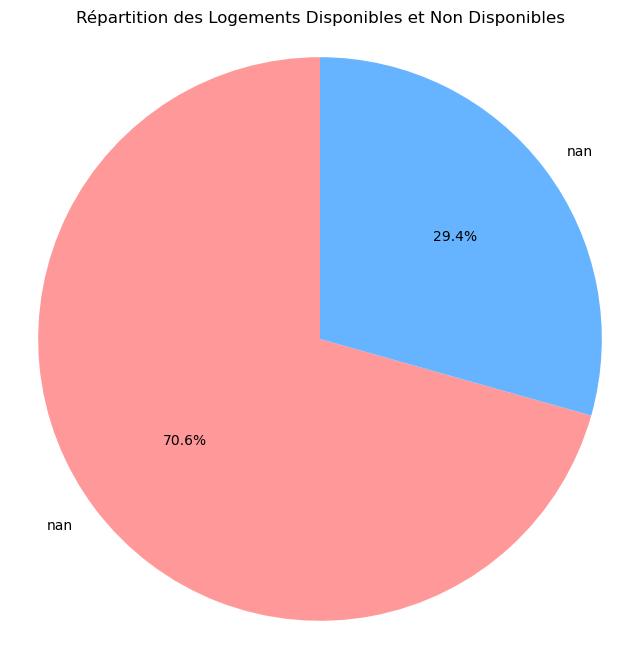

In [85]:
# 10. Comptage de la répartition de 'instant_bookable'
disponibilite = df_cleaned['instant_bookable'].value_counts()

# Remplacer les valeurs 't' et 'f' par des libellés explicites
disponibilite.index = disponibilite.index.map({'t': 'Disponible', 'f': 'Non disponible'})

# Affichage du graphique en secteurs
plt.figure(figsize=(8, 8))
plt.pie(disponibilite, labels=disponibilite.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Répartition des Logements Disponibles et Non Disponibles')
plt.axis('equal')  # Pour que le graphique soit un cercle parfait
plt.show()


# 3.6 Normalisation des données
### Normalisation des données.  transformation des données pour qu'elles aient une moyenne de 0 et un écart-type de 1

In [86]:
# 11. Normalisation des données
scaler = StandardScaler()

# Liste des colonnes numériques à normaliser
colonnes_numeriques = ['price', 'accommodates', 'bedrooms', 'beds', 
                       'minimum_nights', 'maximum_nights', 'number_of_reviews', 
                       'review_scores_rating']

# Appliquer la normalisation
df_cleaned[colonnes_numeriques] = scaler.fit_transform(df_cleaned[colonnes_numeriques])

# Vérification des premières lignes après normalisation
print(df_cleaned.head())


      price       property_type        room_type  accommodates  bedrooms  \
0 -0.780674  Entire rental unit  Entire home/apt     -0.797675 -0.317715   
1 -0.953514  Entire rental unit  Entire home/apt     -0.797675 -1.732019   
2 -0.262153  Entire rental unit  Entire home/apt      0.649691  1.096589   
3 -0.060507  Entire rental unit  Entire home/apt     -0.073992  1.096589   
4 -1.140757  Entire rental unit  Entire home/apt     -1.521358 -0.317715   

       beds bathrooms_text neighbourhood_cleansed host_is_superhost  \
0 -0.913818         1 bath           Observatoire               Non   
1 -0.913818         1 bath         Hôtel-de-Ville               Non   
2 -0.913818         1 bath         Hôtel-de-Ville               Oui   
3  0.500064         1 bath                  Opéra               Non   
4 -0.913818         1 bath                 Louvre               Non   

   minimum_nights  maximum_nights  number_of_reviews  review_scores_rating  \
0       -0.466915       -0.952677     

C:\Users\FranckPERSONNE\AppData\Local\Temp\ipykernel_27276\973000703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[colonnes_numeriques] = scaler.fit_transform(df_cleaned[colonnes_numeriques])


 # 4. Séparation des Données (Train/Test Split)
### Préparer le dataset pour la modélisation en séparant les données en ensemble d'entraînement et de test.


In [87]:
# 12. Séparation des données en train/test
X = df_cleaned.drop('price', axis=1)  # Variables explicatives
y = df_cleaned['price']  # Variable cible

# Séparer en jeu d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification de la séparation
print(X_train.shape, X_test.shape)


(48816, 13) (12205, 13)


# 5. Bonus: Préparation pour la Régression Linéaire
### Placeholder pour la future implémentation d'une régression linéaire.
### Cette section pourra être complétée ultérieurement avec la modélisation et l'évaluation.

In [90]:
# 13. Préparation des données : encodage des variables catégorielles

# Encodage des variables catégorielles avec One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Séparer les variables explicatives (X) et la variable cible (y)
X = df_encoded.drop('price', axis=1)  # Variables explicatives
y = df_encoded['price']  # Variable cible

# Séparation des données en jeu d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification de la séparation
print(X_train.shape, X_test.shape)

# 13. Régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Calcul du R² et de l'erreur quadratique moyenne (RMSE)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')


(48816, 126) (12205, 126)
R²: 0.2764
RMSE: 0.8562


ValueError: could not convert string to float: 'Entire rental unit'

# 6. Conclusion et Perspectives

### Ce notebook constitue la base du prétraitement des données pour le projet AirBnB.
### Chaque membre pourra ajuster ou compléter les sections selon l'évolution du projet.
### Pensez à ajouter des commentaires et des visualisations pertinentes pour documenter vos choix.